## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Import relevent library 

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats as sts
import scipy.stats as stats

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns


# Data Column describtions

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors



# Uncleaned data inspection

In [3]:
old_df = pd.read_csv("kc_house_data.csv")
old_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [14]:
old_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [16]:
old_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

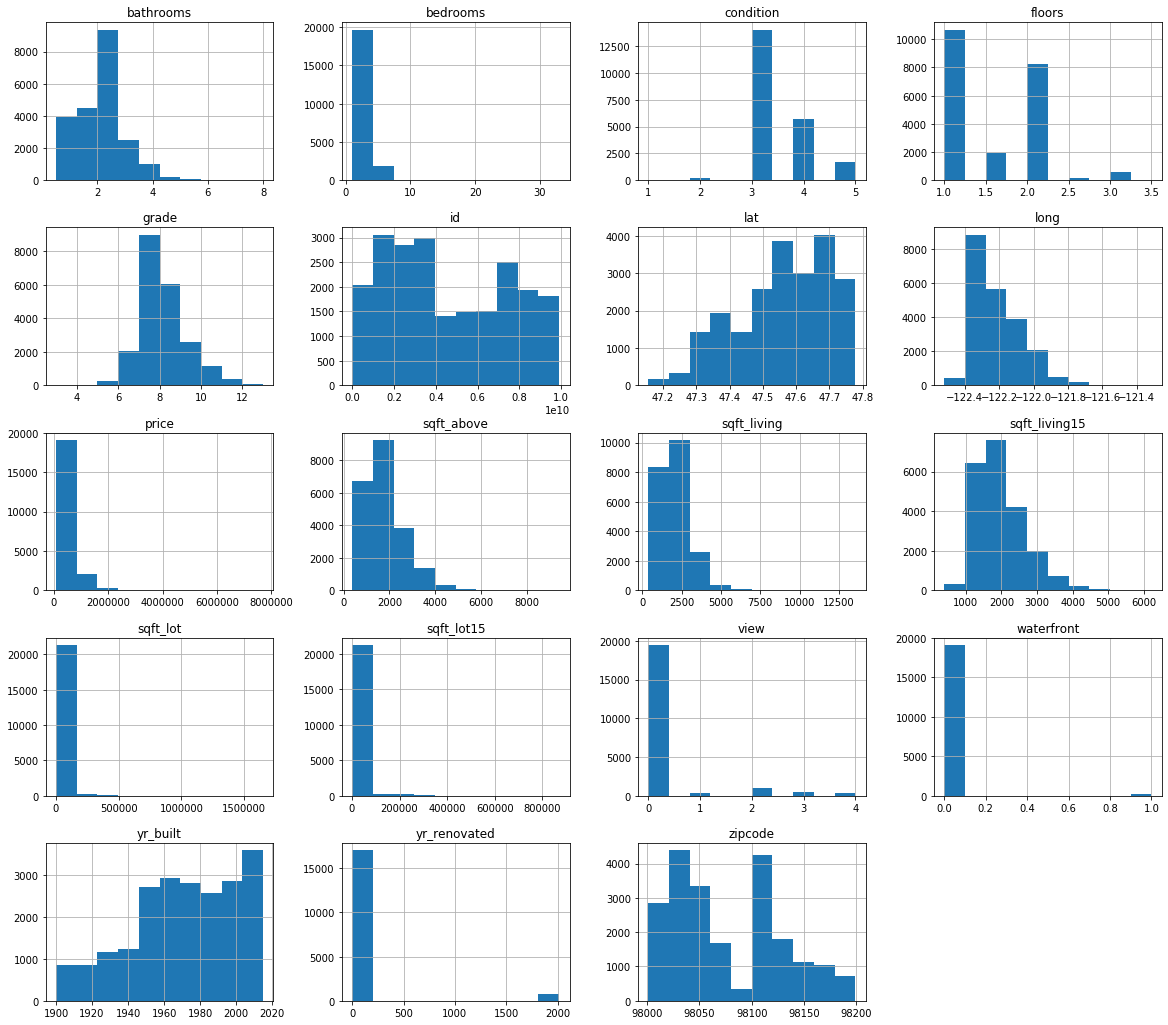

In [9]:
old_df.hist(figsize = (20,18));

In [10]:
# Function that will create hist and scatter plots
def feat_plots(feature,target,df):
   
    #Print feature name to screen
    print(feature)
    
    #Histogram using sns distplot
    plt.title("{} histogram".format(feature))
    sns.distplot(df[feature])
    plt.show()
    
    #Scatter Plot using sns lmplot
    sns.lmplot(x=feature, y=target, data=df, line_kws={'color': 'red'})
    plt.title("{} vs {}".format(target, feature))
    plt.show()
    
    pass

In [11]:
#List of feature names to run histograms and scatterplots on to check for outliers
feat_names = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                 'condition', 'grade', 'sqft_above', 'yr_built',
                 'sqft_living15', 'long', 'lat']

bedrooms


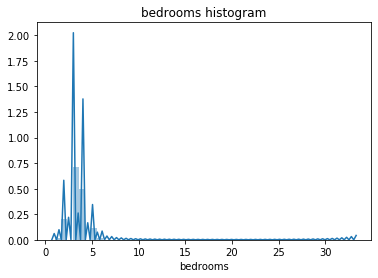

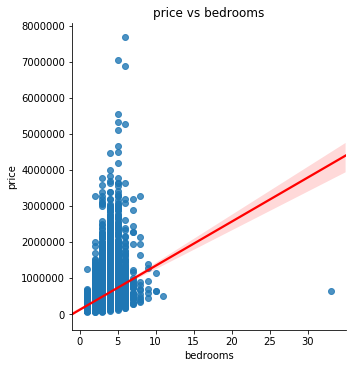

bathrooms


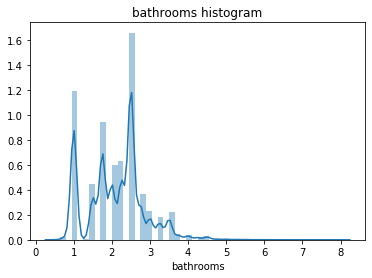

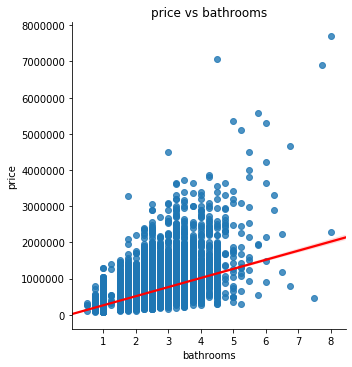

sqft_living


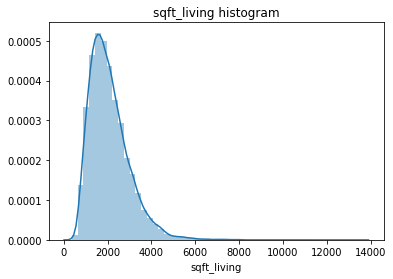

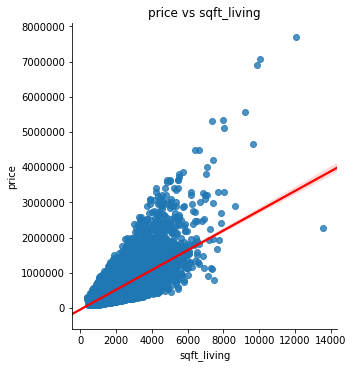

sqft_lot


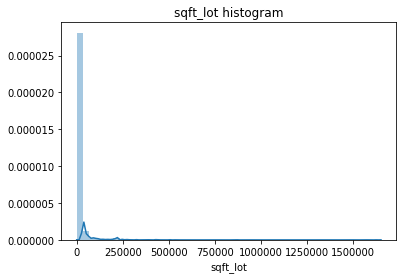

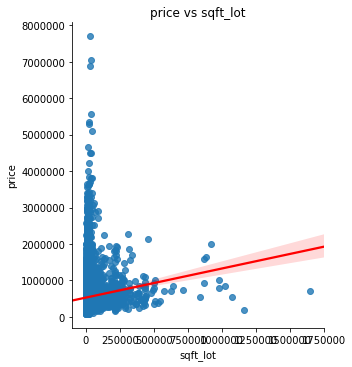

floors


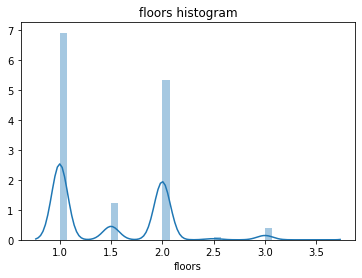

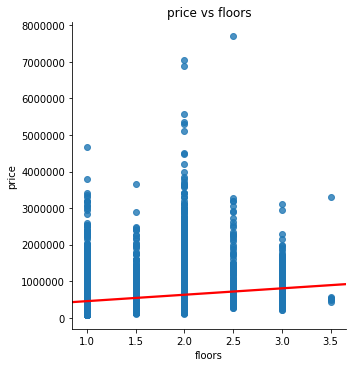

condition


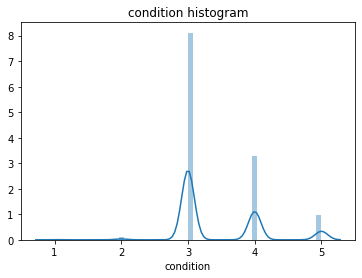

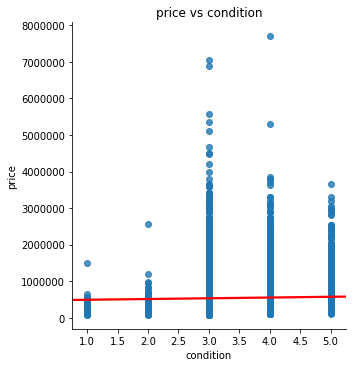

grade


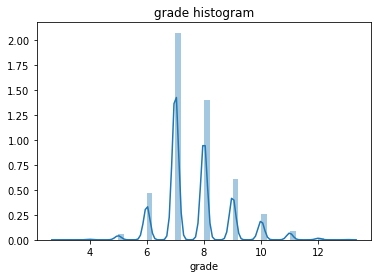

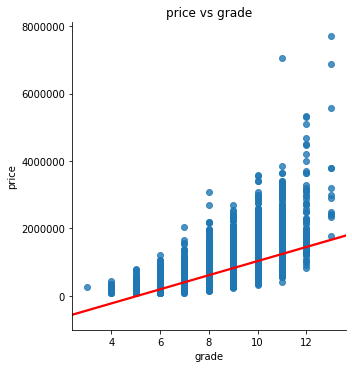

sqft_above


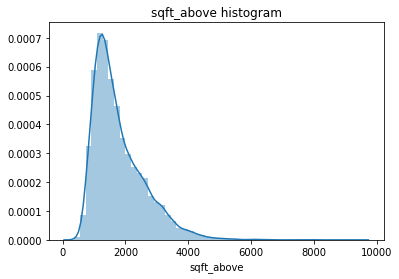

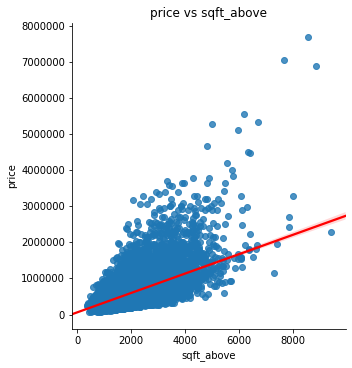

yr_built


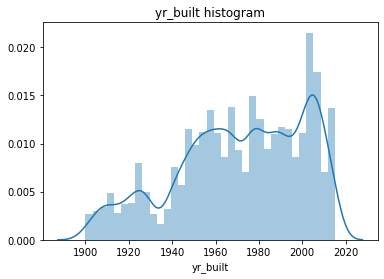

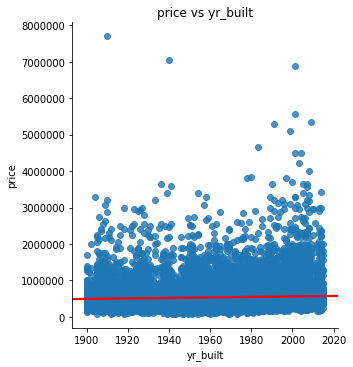

sqft_living15


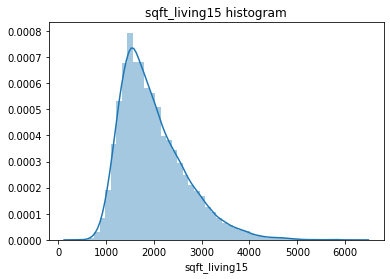

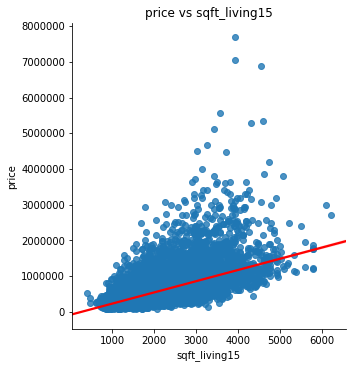

long


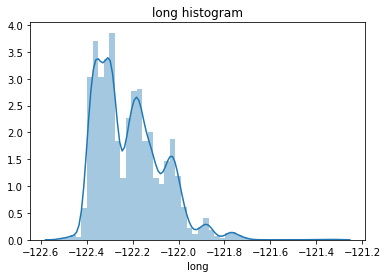

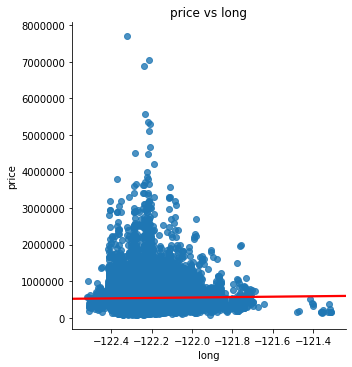

lat


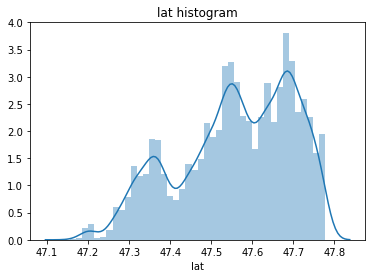

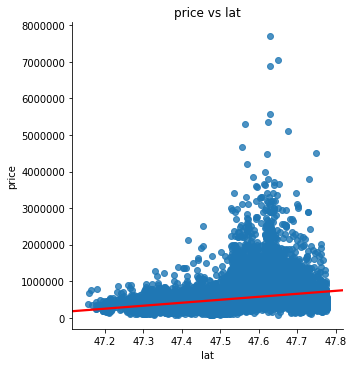

In [12]:

#plot the features in a histogram and scatter w/ target
for feature in feat_names:
    feat_plots(feature, 'price', old_df)

#### There are several outliers in the data set which can lead to more inaccurate modeling results.  I will remove any data points what lie outside of three standarad deviations from the mean.

# Getting rid of outliers

##### No need to run code below that removes outliers because I already have the cleaned dataset

In [ ]:
# z = abs(stats.zscore(old_df))
# print(z)

In [ ]:
# threshold = 3
# print(np.where(z > 3))

In [ ]:
# df = old_df[(z < 3).all(axis=1)]
# df

# Cleaned data set below

In [3]:
# cleaned data
# Need to get code
df = pd.read_csv('no_outliers_housing.csv')

In [4]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
1,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503
2,257500,3,2.25,1715,6819,2.0,0,0,3,7,1715,1995,0,98003,47.3097,-122.327,2238,6819
3,229500,3,1.00,1780,7470,1.0,0,0,3,7,1050,1960,0,98146,47.5123,-122.337,1780,8113
4,323000,3,2.50,1890,6560,2.0,0,0,3,7,1890,2003,0,98038,47.3684,-122.031,2390,7570


In [73]:
len(df)

13676

In [63]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.367600e+04,13676.000000,13676.000000,13676.000000,13676.000000,13676.000000,13676.0,13676.000000,13676.000000,13676.000000,13676.000000,13676.000000,13676.0,13676.000000,13676.000000,13676.000000,13676.000000,13676.000000
mean,4.799088e+05,3.332115,2.044074,1956.652969,9882.167520,1.480257,0.0,0.091474,3.425636,7.540582,1695.523837,1971.855075,0.0,98078.000146,47.559307,-122.220268,1913.679219,9128.082261
std,2.271345e+05,0.850488,0.685038,741.116607,11517.300535,0.539088,0.0,0.400052,0.650994,1.022041,701.934926,28.947814,0.0,53.234309,0.140295,0.128675,596.783211,9118.805569
min,8.200000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.0,0.000000,2.000000,5.000000,370.000000,1900.000000,0.0,98001.000000,47.176400,-122.502000,460.000000,659.000000
25%,3.110000e+05,3.000000,1.500000,1400.000000,5000.000000,1.000000,0.0,0.000000,3.000000,7.000000,1170.000000,1953.000000,0.0,98033.000000,47.464600,-122.329000,1470.000000,5000.000000
50%,4.325000e+05,3.000000,2.250000,1850.000000,7350.000000,1.000000,0.0,0.000000,3.000000,7.000000,1510.000000,1976.000000,0.0,98065.000000,47.570600,-122.234000,1800.000000,7447.000000
75%,5.976250e+05,4.000000,2.500000,2420.000000,9877.500000,2.000000,0.0,0.000000,4.000000,8.000000,2090.000000,1997.000000,0.0,98117.000000,47.680300,-122.133000,2270.000000,9600.000000
max,1.500000e+06,6.000000,4.250000,4720.000000,137214.000000,3.000000,0.0,2.000000,5.000000,11.000000,4220.000000,2015.000000,0.0,98199.000000,47.777600,-121.797000,4020.000000,95832.000000


# EDA

In [7]:
correlations = df.corr()
correlations['price'].sort_values(ascending=False)

price            1.000000
grade            0.633551
sqft_living      0.623250
sqft_living15    0.550986
sqft_above       0.531691
bathrooms        0.441895
lat              0.436933
bedrooms         0.307001
floors           0.276269
view             0.195328
sqft_lot         0.096700
sqft_lot15       0.088446
long             0.079537
yr_built         0.061517
condition        0.048686
zipcode         -0.036572
waterfront            NaN
yr_renovated          NaN
Name: price, dtype: float64

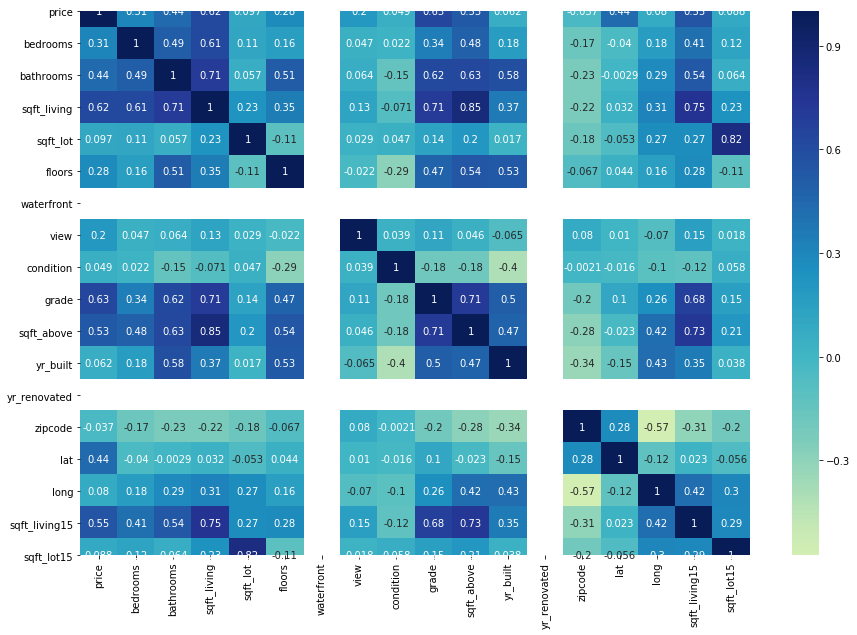

In [20]:

#Heatmap of all correlation coefficients
plt.figure(figsize=(15,10))
sns.heatmap(correlations, center=0, annot=True, cmap="YlGnBu")

# Evaluate the heatmap 
- There is some very strong multicol. in the upper left hand corner
    - bathroom
    - bedroom
    - grade
    - sqft_lot
    - sqft_living
- Stangely enough zipcode seems to have a very weak correlation which I find to be very stange


# Visualizing linearity 

In [37]:
#List of feature names to run histograms and scatterplots on to check for outliers
feat_names = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                 'condition', 'grade', 'sqft_above', 'yr_built',
                 'sqft_living15', 'long', 'lat']

In [38]:
len(feat_names)

12

bedrooms


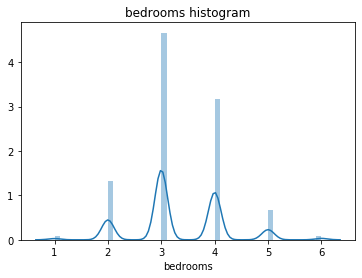

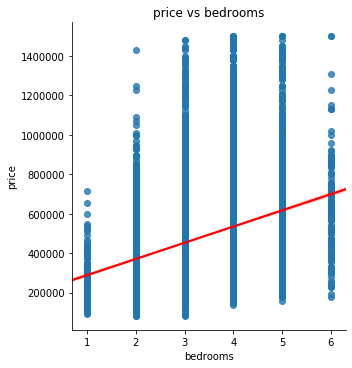

bathrooms


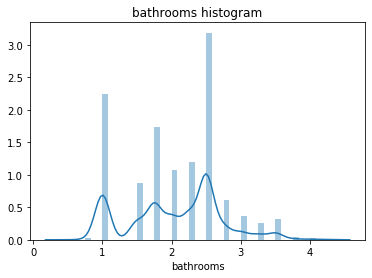

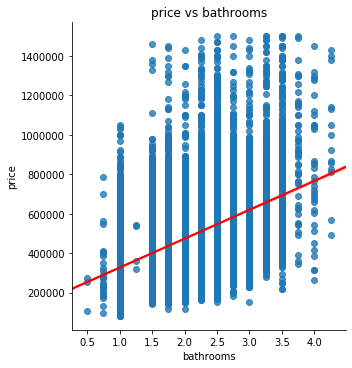

sqft_living


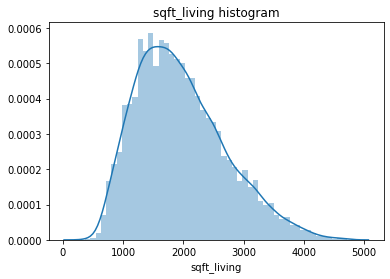

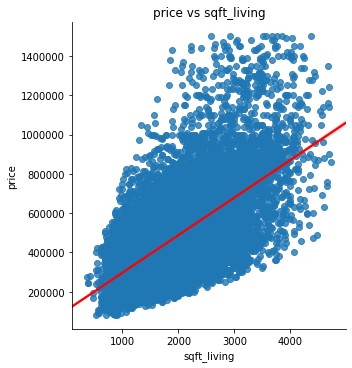

sqft_lot


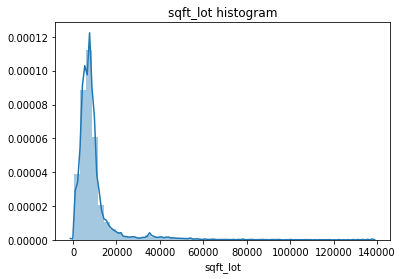

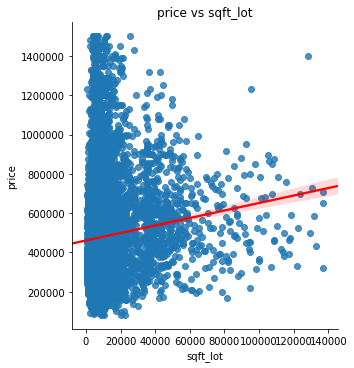

floors


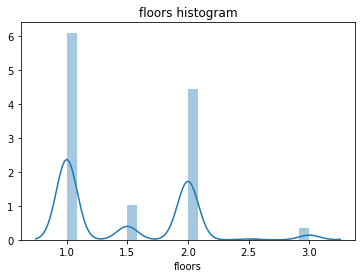

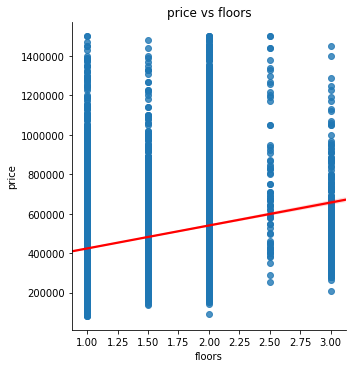

condition


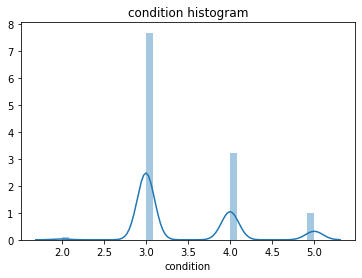

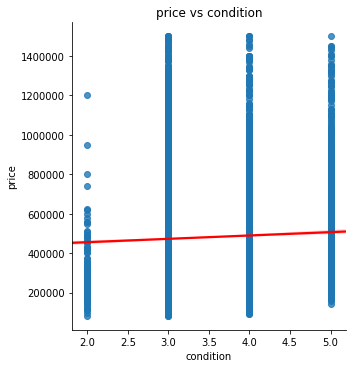

grade


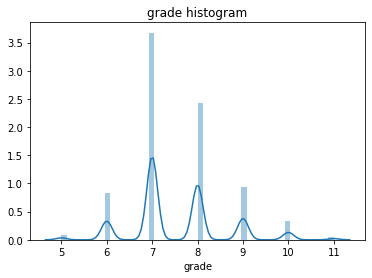

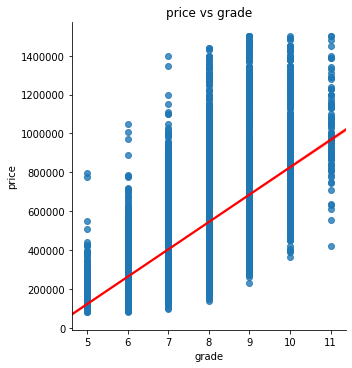

sqft_above


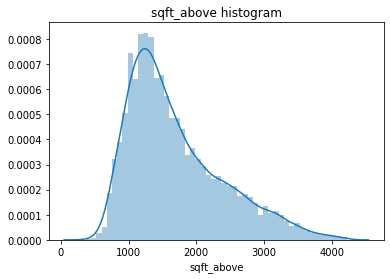

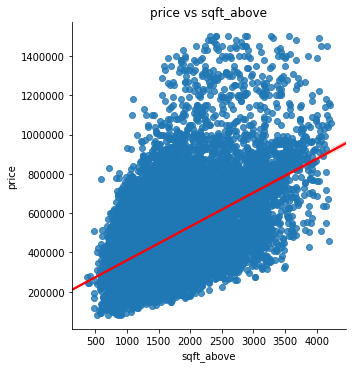

yr_built


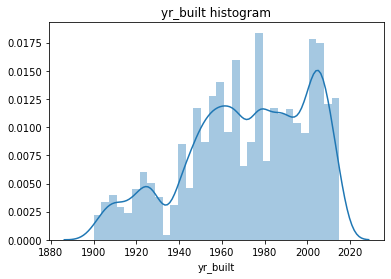

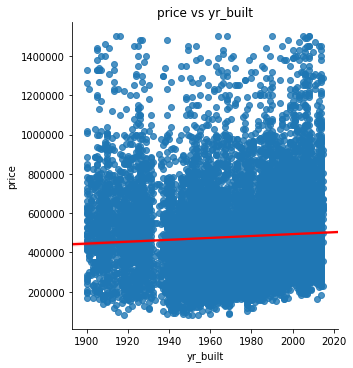

sqft_living15


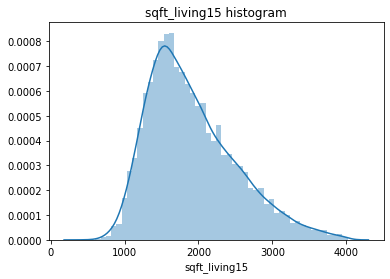

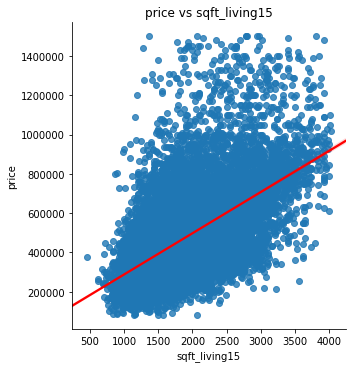

long


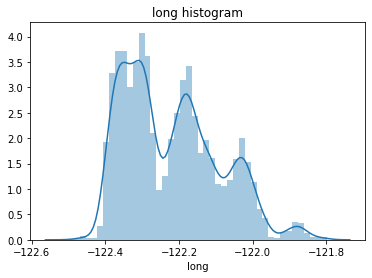

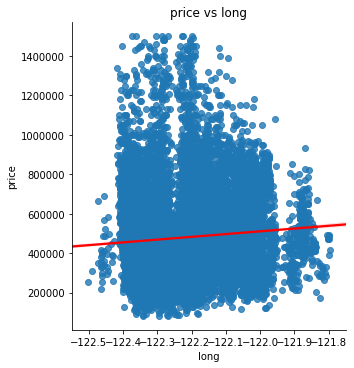

lat


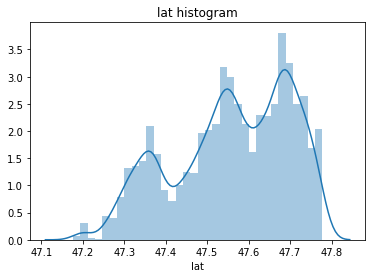

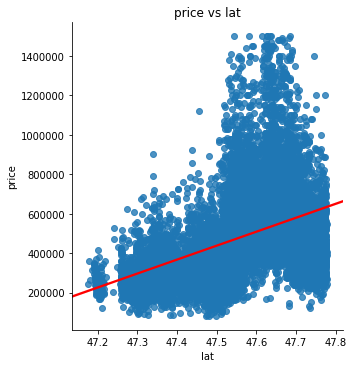

In [39]:

#plot the features in a histogram and scatter w/ target
for feature in feat_names:
    feat_plots(feature, 'price', df)

# Question 1
- Where are the highest distribution of highly priced houses?  
- Does location have a major effect on price?  I would assume that the houses towards the inner city and on the waterfront would be more expensive.  

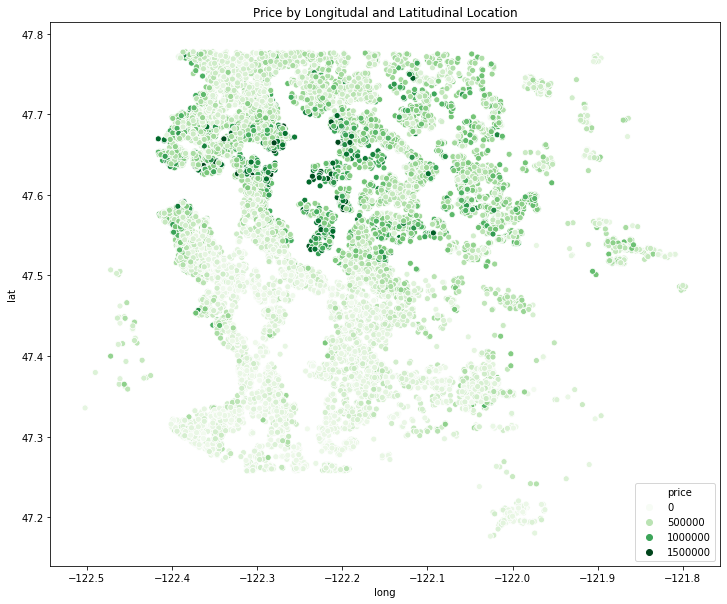

In [132]:
plt.figure(figsize=(12,10))
sns.scatterplot(df['long'], df['lat'], hue=df['price'], palette='Greens')
plt.legend(loc='lower right')
plt.title("Price by Longitudal and Latitudinal Location");

# Anwser Question 1
- There is a large numberinflux of high priced houses in the Kirkland and Bellevue area (darker greens).  This may be due to several reasons. One reason maybe due to the close proximity of the water and beaches as well as its proximity to Seattle.  As well as the Amazon Spheres which are three spherical conservatories that are part of the Amazon headquarters campus in Seattle, Washington, United States.  There is also lots of shopping and resturants avalible.

In [59]:
outcome = "price"
x_columns = ['long', 'lat']

In [60]:
predictors = '+'.join(x_columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     1805.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:08:14   Log-Likelihood:            -1.8647e+05
No. Observations:               13676   AIC:                         3.730e+05
Df Residuals:                   13673   BIC:                         3.730e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.299e+06   1.69e+06     -3.142      0.002    -8.6e+06   -1.99e+06
long        2.384e+05   1.35e+04     17.622      0.000    2.12e+05    2.65e+05
lat         7.342e+05   1.24e+04     59.167      0.000     7.1e+05    7.58e+05
==============================================================================
Omnibus:                     3650.312   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10301.451
Skew:                           1.409   Prob(JB):                         0.00
Kurtosis:                       6.184   Cond. No.                     1.28e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Anwser Question 1 pt2
- With this model that has been run we have:
    - An R-Squared of 0.209
        - This is not the best, but this would make some sense seeing as though many other factors would contribute to the housing prices
    - We also got P-values of 0.00 which means that the coef is significant 

# Question 2: Does the sqft_living have an impact on the value of the house?


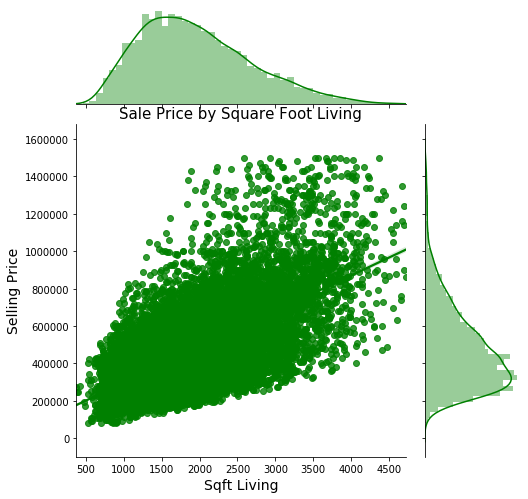

In [72]:
sns.jointplot(x = 'sqft_living', y = 'price' , data = df, kind = 'reg', height = 7, xlim = (370, 4720), 
              color = 'g', ratio = 3)

plt.title('Sale Price by Square Foot Living', fontsize = 15)
plt.ylabel('Selling Price', fontsize = 14)
plt.xlabel('Sqft Living', fontsize = 14)
plt.show()

# Answer Question 2:
- According to the scatter plot above which plots sqft living against selling price, there appears to be a positive  linear relationship.  The regression line which approximily starts below 200000(thousand) and ends at approxmitly 1000000(million) has an upwards slope which indicates that if there is an increase in sqft living then there will be an increase in selling price.

In [67]:
outcome = "price"
x_columns = ['sqft_living']

In [68]:
predictors = '+'.join(x_columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     8685.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:33:59   Log-Likelihood:            -1.8471e+05
No. Observations:               13676   AIC:                         3.694e+05
Df Residuals:                   13674   BIC:                         3.694e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.062e+05   4288.360     24.757      0.000    9.78e+04    1.15e+05
sqft_living   191.0112      2.050     93.195      0.000     186.994     195.029
==============================================================================
Omnibus:                     1922.448   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3605.741
Skew:                           0.898   Prob(JB):                         0.00
Kurtosis:                       4.762   Cond. No.                     5.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Question 2 statistical discussion 
- The first thing to notice is that we have a P-value of 0, this indicates that our coef is signicifant.
- Also our R-squared is pretty high for only one feature at 0.388.  This could be an important feature for the final model.

# Question 3 Does the year the house was build play a role in the price?

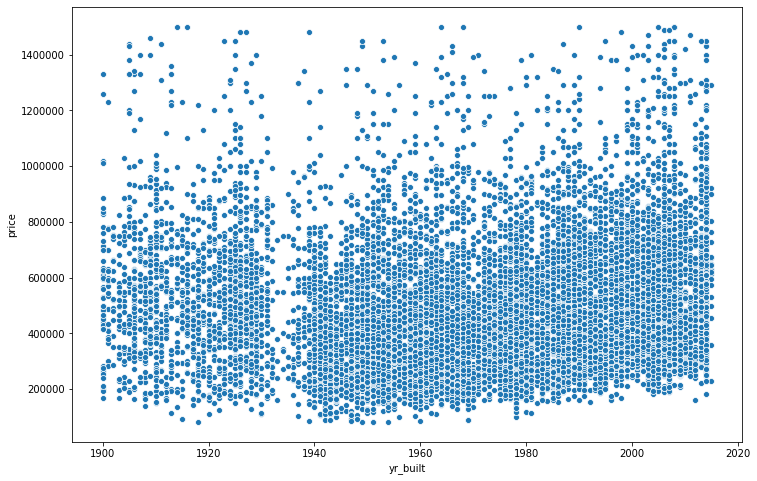

In [80]:
fig = plt.figure(figsize=(12,8)) 
sns.scatterplot(x=df['yr_built'], y=df['price'])
plt.show()

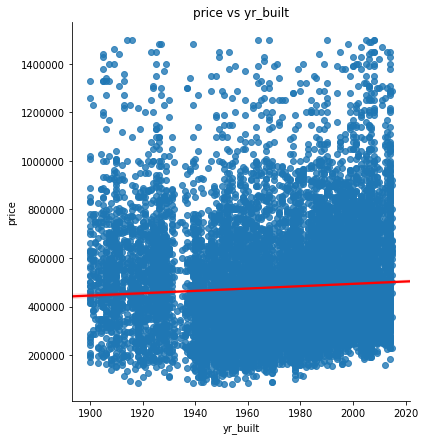

In [88]:
#lmplot shows the best fit line for the price and yr_built
fig
sns.lmplot('yr_built','price',df, line_kws={'color': 'red'}, size=6)
plt.title("price vs yr_built")
plt.show()

In [89]:
outcome = "price"
x_columns = ['yr_built']

In [90]:
predictors = '+'.join(x_columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     51.94
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           6.01e-13
Time:                        16:25:35   Log-Likelihood:            -1.8805e+05
No. Observations:               13676   AIC:                         3.761e+05
Df Residuals:                   13674   BIC:                         3.761e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.719e+05   1.32e+05     -3.573      0.000   -7.31e+05   -2.13e+05
yr_built     482.6874     66.972      7.207      0.000     351.412     613.963
==============================================================================
Omnibus:                     2866.546   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5836.137
Skew:                           1.248   Prob(JB):                         0.00
Kurtosis:                       5.002   Cond. No.                     1.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Anwser question 3:
- The data shows that there is no clear linear relationship between yr_built and price.  This means that regardless of year the house was built it really shouldn't play a factor in the price.  You can find a house that is built in the 1900's what will be well over 1,000,000 USD and a house built in 2018 can be equally expensive.
- This is analysis can be further by the OLS regression.
    - There is a remarkably low R-Squared error

# Modeling 

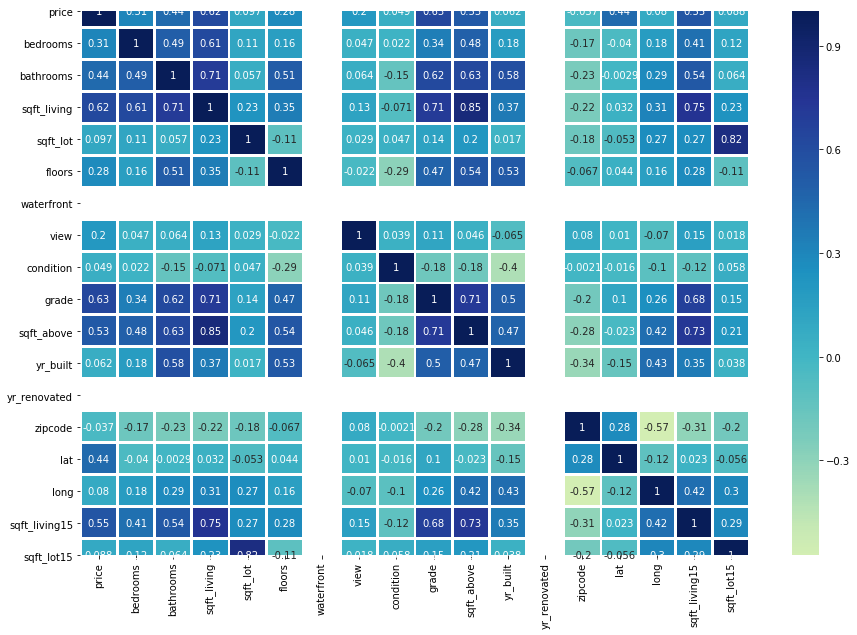

In [93]:
plt.figure(figsize=(15,10))
sns.heatmap(correlations, center=0, annot=True, cmap="YlGnBu", linewidths=2)

## Dealing with Multicol

- From the heatmap above we can observe that there are several features that are colinear as well as features that have weak correlations
    - We are goin to drop all features that are colinear as well as have a week correlation

In [95]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [98]:
 df1 = df1 = df.drop(['sqft_living15','sqft_above','sqft_lot15', 'bathrooms', 'waterfront', 'sqft_above', 'sqft_living15'], axis=1)

In [99]:
df1.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long'],
      dtype='object')

# Test Train split

In [100]:
y = df1['price']

features_df = df1.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features_df,df1['price'],test_size=0.2)

# Model 1

In [101]:
linreg = sm.OLS(y_train, X_train).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                          1.574e+04
Date:                Fri, 05 Jun 2020   Prob (F-statistic):                        0.00
Time:                        03:22:30   Log-Likelihood:                     -1.4431e+05
No. Observations:               10940   AIC:                                  2.886e+05
Df Residuals:                   10929   BIC:                                  2.887e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
bedrooms     -1.135e+04   1885.057     -6.022      0.000    -1.5e+04   -7657.379
sqft_living    122.4859      2.969     41.258      0.000     116.667     128.305
sqft_lot        -0.4106      0.116     -3.539      0.000      -0.638      -0.183
floors        4.017e+04   2916.231     13.775      0.000    3.45e+04    4.59e+04
view          4.998e+04   3134.637     15.946      0.000    4.38e+04    5.61e+04
condition     2.709e+04   2116.584     12.800      0.000    2.29e+04    3.12e+04
grade          9.04e+04   1951.611     46.321      0.000    8.66e+04    9.42e+04
yr_built     -1931.9312     58.561    -32.990      0.000   -2046.721   -1817.142
yr_renovated  4.591e-10   1.21e-11     37.802      0.000    4.35e-10    4.83e-10
zipcode       -325.1477     17.280    -18.816      0.000    -359.020    -291.276
lat           5.848e+05   9528.599     61.368      0.000    5.66e+05    6.03e+05
long             -6e+04   1.28e+04     -4.699      0.000    -8.5e+04    -3.5e+04
==============================================================================
Omnibus:                     2433.643   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8936.760
Skew:                           1.083   Prob(JB):                         0.00
Kurtosis:                       6.862   Cond. No.                     2.31e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.99e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Model 2

# Dropping several features due to various reasons:
    - dropping yr_renovated
        - low correlation
    - drop sqft_lot 
        - high colinearity wiht sqft_living
    - drop bedrooms
        - high colinearity with sqft_living
    - drop view
        - weak correaltion with price
    - drop bathroom
        - colinear with sqft_living
    - drop condition
        - weark correlation
    - drop yr_built
        - not linear relationship 
    - drop long
        - weak correlation and lat is better feature
    - drop grade
        - high colinearity
    - drop zip
        

In [103]:
features_df.head()

,bedrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,4,1960,5000,1.0,0,5,7,1965,0,98136,47.5208,-122.393
1,3,1680,8080,1.0,0,3,8,1987,0,98074,47.6168,-122.045
2,3,1715,6819,2.0,0,3,7,1995,0,98003,47.3097,-122.327
3,3,1780,7470,1.0,0,3,7,1960,0,98146,47.5123,-122.337
4,3,1890,6560,2.0,0,3,7,2003,0,98038,47.3684,-122.031


In [111]:
features_df_1 = features_df.drop(['yr_renovated', 'sqft_lot', 'bedrooms', 'view', 'condition', 'yr_built', 'long', 'grade', 'zipcode'], axis=1)

In [112]:
y = df1['price']

features_df = df1.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features_df_1,df1['price'],test_size=0.2)

In [113]:
linreg = sm.OLS(y_train, X_train).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.888
Method:                 Least Squares   F-statistic:                          2.900e+04
Date:                Fri, 05 Jun 2020   Prob (F-statistic):                        0.00
Time:                        03:49:54   Log-Likelihood:                     -1.4772e+05
No. Observations:               10940   AIC:                                  2.955e+05
Df Residuals:                   10937   BIC:                                  2.955e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   181.3660      2.453     73.943      0.000     176.558     186.174
floors       2.547e+04   3377.794      7.541      0.000    1.88e+04    3.21e+04
lat          1825.0027    121.970     14.963      0.000    1585.920    2064.085
==============================================================================
Omnibus:                     1704.420   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3423.339
Skew:                           0.952   Prob(JB):                         0.00
Kurtosis:                       4.970   Cond. No.                     4.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
corr = features_df_1.corr()

In [115]:
corr

,sqft_living,floors,lat
sqft_living,1.000000,0.348410,0.031582
floors,0.348410,1.000000,0.044176
lat,0.031582,0.044176,1.000000


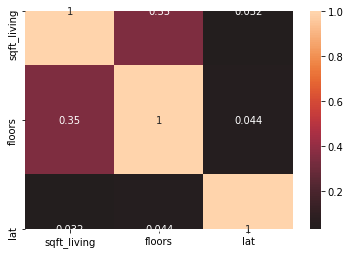

In [117]:
fig
sns.heatmap(corr, center=0, annot=True)

# Model Summary 
- Model Results
    - R-squared: .888
        - Good because it is high and there isn't high colinearity between features
    - F-statistic: 2.900e+04
        - explain
    - P-value
        - We have a p-value of 0.00 for all of our features
            - This tells us that our predicitve features are not arbitrary 
    - Coefficents
        - sqft_living has a positive correlation
        - floors has a positive correlation
        - lat has a positive correlation
    - Residuals
        - explain
    - Write up
        - 
     

# Model Validation

- In order to ensure our accuracy of our model to predict sales prices for the Seattle housing market, I will be proforming a train-test split using sklearn's feature train_test_split. 
- The split will be a 80/20 split, meaning 80% training data and 20% testing data.


In [118]:
X_train, X_test, y_train, y_test = train_test_split(features_df_1,df1['price'],test_size=0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

10940 2736 10940 2736


## Step 1: Run a the regression model with ONLY the training set

In [119]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Step 2: Calculate the prediction on the training set and on the testing set

In [121]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

## Step 3: Calculate the prediction on the traing set as well as the testing set

In [122]:
train_res = y_hat_train - y_train
test_res = y_hat_test - y_test

## Step 4: Examine the Mean Squared Error

In [123]:
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)       

print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 22451134391.0579
Test Mean Squarred Error: 22388409429.18504


## Step 5: Examine Residuals

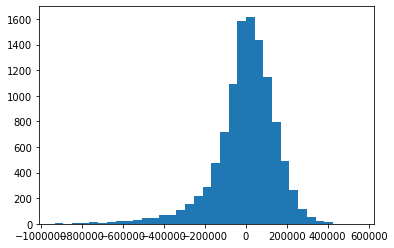

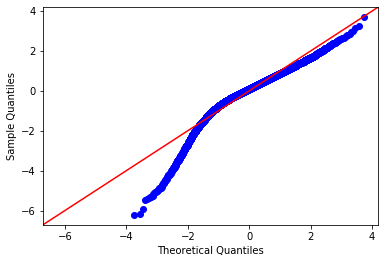

In [126]:
# Training residuals
plt.hist(train_res, bins=35)

sm.graphics.qqplot(train_res,dist=stats.norm,line='45',fit=True)

plt.show()

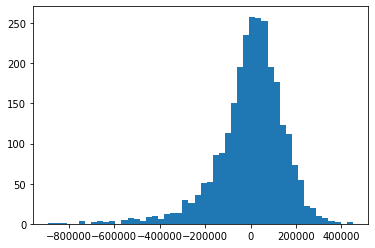

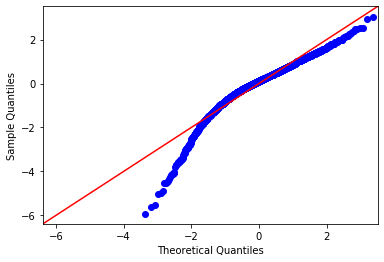

In [129]:
# Test residuals
plt.hist(test_res, bins=50)

sm.graphics.qqplot(test_res, dist=stats.norm,line='45', fit=True)

plt.show()

#  Residuals Normality

After observing the histogram of the residuals it seems to follow a normal distribution but is skewed.  This is furthed but observing the QQ plot which shows some non-normality.

The skew comes from the prices in the data set.  The distribution of price hasa a long tail which indicates outliers in the most expensive direction.

# K-Fold Cross Validation

## Below is the examination of the first 6 rows

# Clean data

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4.580474e+09,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2.876736e+09,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [5]:
df.isna().sum()
# remove yr_renovated & view
#fill waterfront with either mean or median 

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
df.shape

(21597, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [8]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

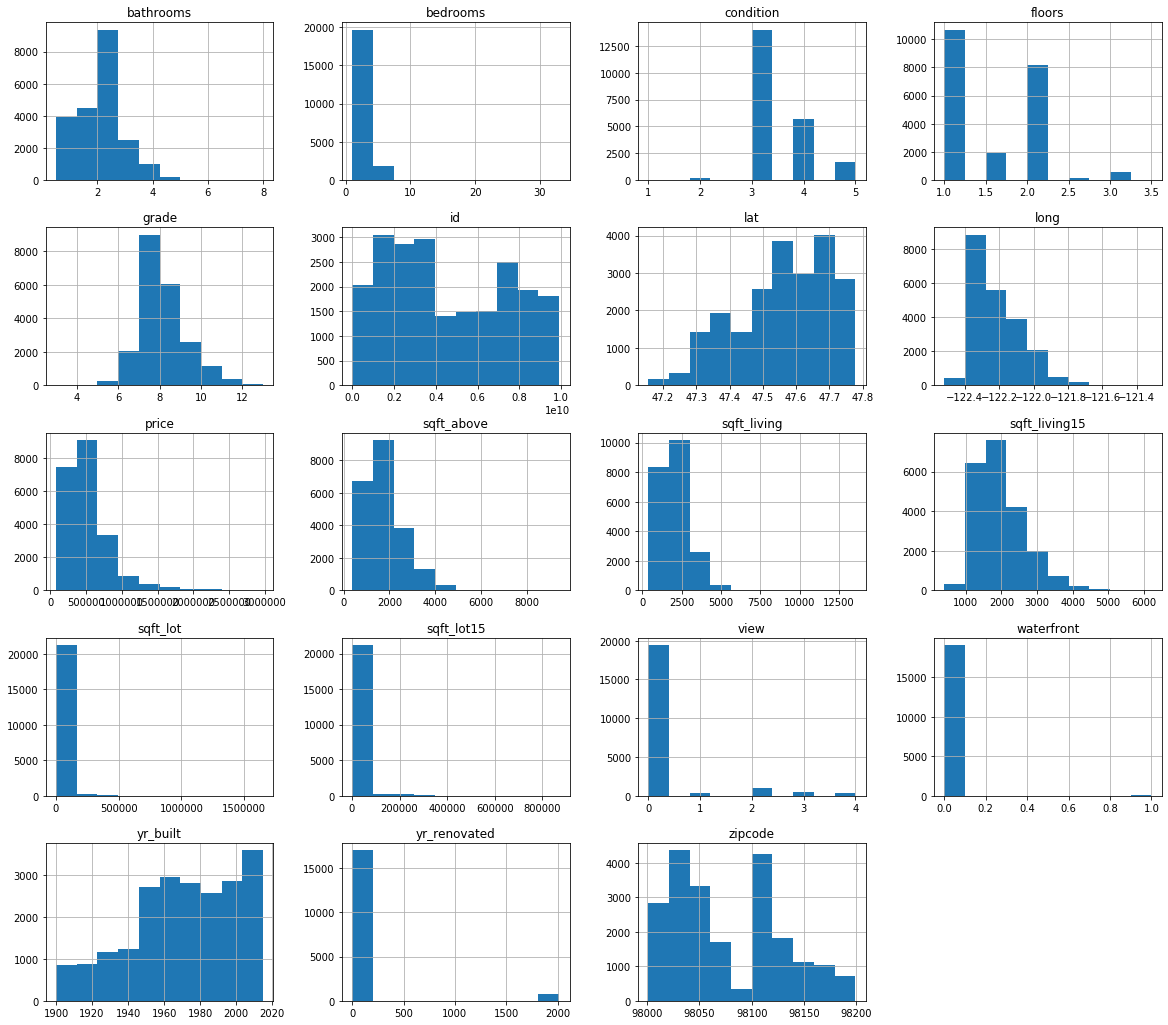

In [34]:
df.hist(figsize = (20,18));

In [9]:
len(df.columns)


21

# Check for linearity

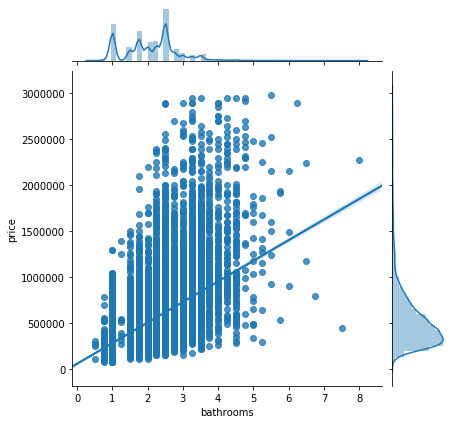

In [38]:
sns.jointplot('bathrooms', 'price', data=df, kind='reg')

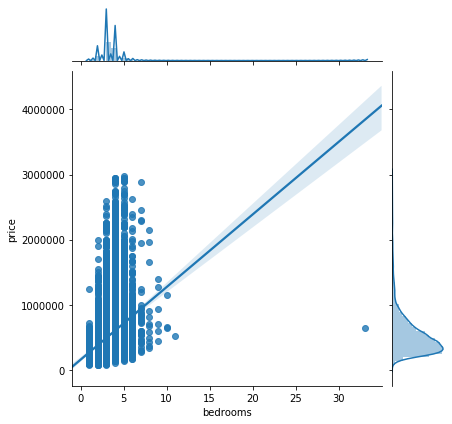

In [39]:
sns.jointplot('bedrooms', 'price', data=df, kind='reg')

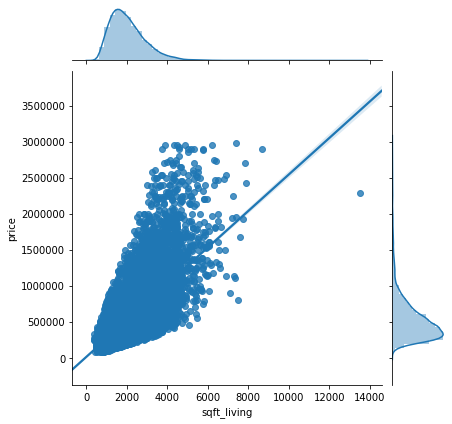

In [41]:
sns.jointplot('sqft_living', 'price', data=df, kind='reg')

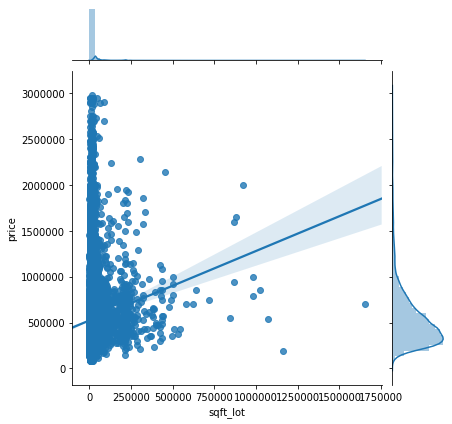

In [42]:
sns.jointplot('sqft_lot', 'price', data=df, kind='reg')

# Check for multicollinearity

In [52]:
features = ['bedrooms', 'sqft_living', 'sqft_lot', 'bathrooms','price']
corr = df[features].corr()
corr

,bedrooms,sqft_living,sqft_lot,bathrooms,price
bedrooms,1.000000,0.580244,0.032204,0.511791,0.314582
sqft_living,0.580244,1.000000,0.176298,0.750212,0.691017
sqft_lot,0.032204,0.176298,1.000000,0.088216,0.095983
bathrooms,0.511791,0.750212,0.088216,1.000000,0.518968
price,0.314582,0.691017,0.095983,0.518968,1.000000


<Figure size 1152x4032 with 0 Axes>

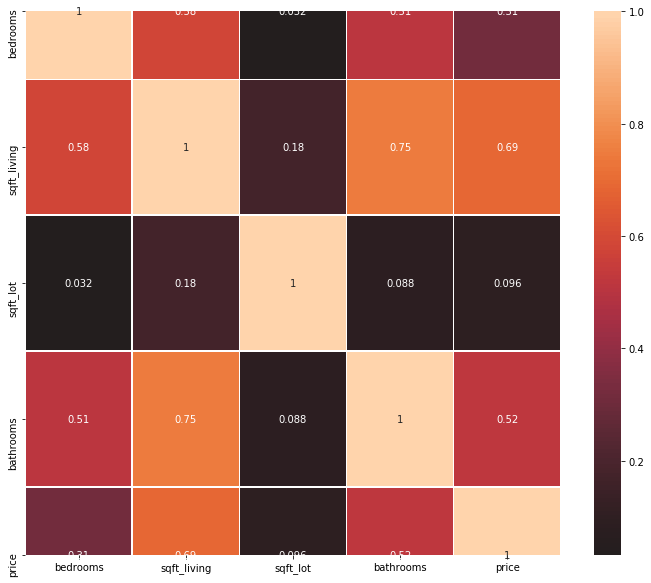

<Figure size 1152x4032 with 0 Axes>

In [85]:

fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(corr, center=0, annot=True, linewidths=.5, ax=ax)
plt.figure(figsize=(16, 56))
#plt.show()

# Todo
- Clean the first six columns price-floor
    - get rid of outliers
    - no missing data or nan or null as far as i can see
    - do something to date

In [10]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

df.date.dtype

dtype('<M8[ns]')

# Outliers?

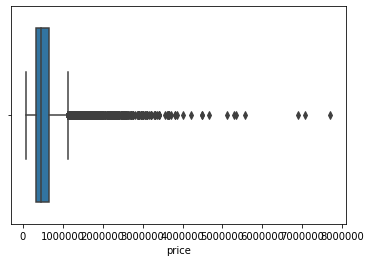

In [11]:
fig = figsize=(8,5)
sns.boxplot(x=df['price'])
plt.show()

In [12]:
df.price.value_counts().tail(20)

837700.0    1
118000.0    1
641200.0    1
969000.0    1
386180.0    1
608500.0    1
542950.0    1
968933.0    1
641250.0    1
575700.0    1
739500.0    1
575575.0    1
418900.0    1
234975.0    1
804995.0    1
870515.0    1
336950.0    1
386100.0    1
176250.0    1
884744.0    1
Name: price, dtype: int64

In [13]:
df = df.loc[df['price']<3000000]
#drop all prices greater the 3000000

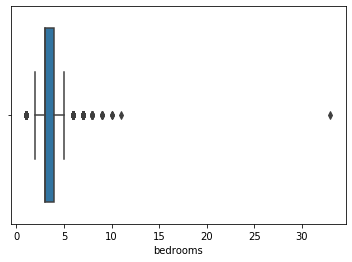

In [14]:
# def outliers
fig 
sns.boxplot(x=df["bedrooms"])


In [15]:
df.bedrooms.value_counts()

3     9815
4     6870
2     2759
5     1580
6      266
1      196
7       37
8       12
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [16]:
np.percentile(df['bedrooms'], 95)

5.0

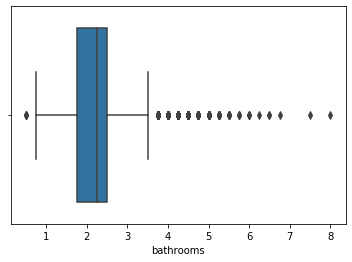

In [17]:
fig
sns.boxplot(x=df['bathrooms'])
# Where is the cut off point?

/Users/jari/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


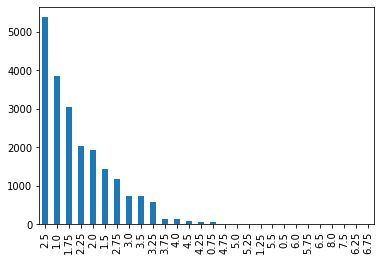

In [18]:
df.bathrooms.value_counts().plot('bar')

In [19]:
np.percentile(df['bathrooms'], 95)

3.5

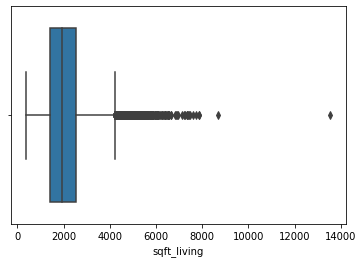

In [20]:
fig 
sns.boxplot(x=df['sqft_living'])

In [21]:
np.percentile(df['sqft_living'], 95)

3730.0

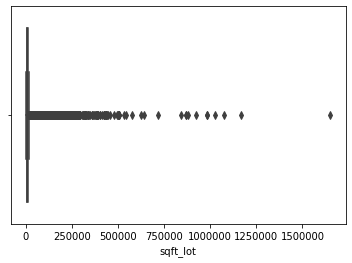

In [22]:
# lots of outliers
fig 
sns.boxplot(x=df['sqft_lot'])

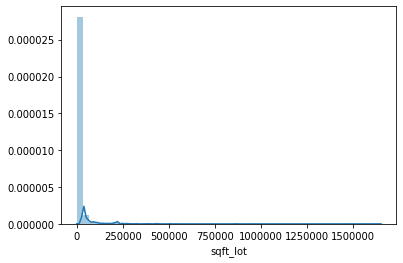

In [23]:
fig
sns.distplot(df['sqft_lot'])
plt.show()

In [57]:
#np.percentile(df['sqft_lot'], 95)

43208.5

In [63]:
#np.where(df['sqft_lot']<=43208.5)[0]

array([    0,     1,     2, ..., 21543, 21544, 21545])

In [65]:
#df = df.loc[df['sqft_lot']<43208.5]

In [1]:
df

NameError: name 'df' is not defined

In [30]:
df1 = df[['date', 'price','bedrooms', 'sqft_living', 'sqft_lot']].copy()

In [32]:
df1.head()

,date,price,bedrooms,sqft_living,sqft_lot
0,2014-10-13,221900.0,3,1180,5650
1,2014-12-09,538000.0,3,2570,7242
2,2015-02-25,180000.0,2,770,10000
3,2014-12-09,604000.0,4,1960,5000
4,2015-02-18,510000.0,3,1680,8080


In [75]:
df1.shape

(21546, 5)

In [70]:
outcome = "price"
x_columns = ['bedrooms', 'sqft_living', 'sqft_lot']

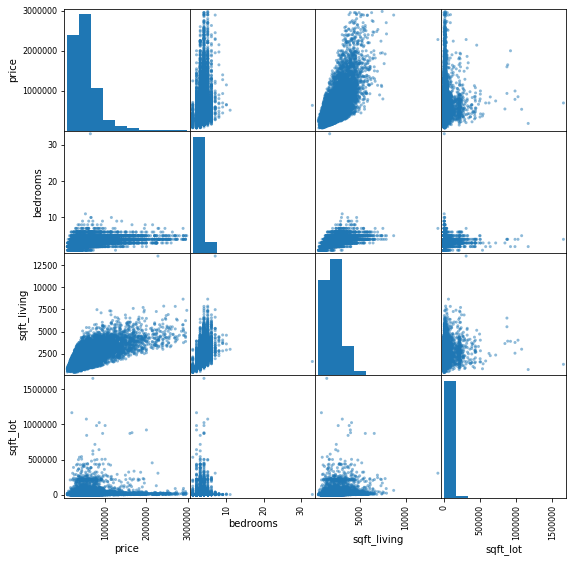

In [71]:
pd.plotting.scatter_matrix(df1, figsize  = [9, 9]);



# First test

In [72]:
# fitting the actual model
predictors = '+'.join(x_columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     6900.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:53:30   Log-Likelihood:            -2.9694e+05
No. Observations:               21546   AIC:                         5.939e+05
Df Residuals:                   21542   BIC:                         5.939e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.087e+05   6049.377     17.969      0.000    9.68e+04    1.21e+05
bedrooms    -4.753e+04   2126.025    -22.355      0.000   -5.17e+04   -4.34e+04
sqft_living   284.1417      2.232    127.308      0.000     279.767     288.516
sqft_lot       -0.2873      0.039     -7.329      0.000      -0.364      -0.210
==============================================================================
Omnibus:                     8806.757   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68232.442
Skew:                           1.776   Prob(JB):                         0.00
Kurtosis:                      10.961   Cond. No.                     1.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
# LOOK INTO THISSSSSSSSSSSSSSSS
# checking multc.
X = df1[x_columns]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_columns, vif))

[('bedrooms', 9.612309532337143),
 ('sqft_living', 9.949211179751241),
 ('sqft_lot', 1.1743333231662956)]

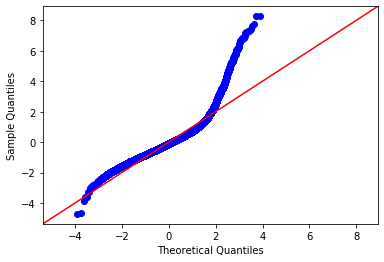

In [84]:
fig1 = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [73]:
# no bedrooms
outcome = "price"
x_columns_1 = ['sqft_living', 'sqft_lot']

# Second test

In [76]:
predictors = '+'.join(x_columns_1)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     9871.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:57:16   Log-Likelihood:            -2.9718e+05
No. Observations:               21546   AIC:                         5.944e+05
Df Residuals:                   21543   BIC:                         5.944e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7703.2836   4069.032      1.893      0.058    -272.321    1.57e+04
sqft_living   255.0029      1.833    139.148      0.000     251.411     258.595
sqft_lot       -0.2107      0.040     -5.334      0.000      -0.288      -0.133
==============================================================================
Omnibus:                     8804.461   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66893.730
Skew:                           1.783   Prob(JB):                         0.00
Kurtosis:                      10.861   Cond. No.                     1.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
df3 = pd.read_csv("housing_dataset_cleaned.csv")

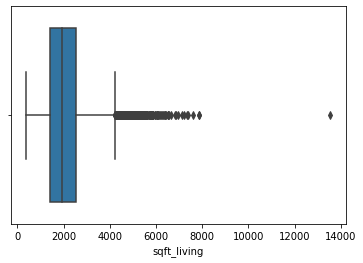

In [82]:
fig
sns.boxplot(df3['sqft_living'])